In [17]:
import pandas as pd
import numpy as np
import bilby
import pickle

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from matplotlib import rcParams
from scipy.stats import gaussian_kde

In [2]:
import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import icarogw

Config not imported, automatically decides between Numpy and Cupy
Error in importing cupy


In [31]:
# General settings
import matplotlib as mpl
mpl.rc_file('/Users/ulyana/Documents/PhDThesisPlots/matplotlibrc')

mpl.rc('xtick', labelsize = 18) 
mpl.rc('ytick', labelsize = 18)

In [32]:
path_to_plots = 'plots/'

In [33]:
my_color = '#97a7a7'
my_color_darker = '#2f4f4f'
my_color2 = '#f8c997'
my_color2_darker = '#f6b26b'

In [34]:
def alpha_z_inj(z):
    return 5.325+2.99*z
def beta_z_inj(z):
    return 3.05-1.063*z
def mmin_z_inj(z):
    return 7.8+0.324*z
def mmax_z_inj(z):
    return 87.58+17.16*z
def mu_g_z_inj(z):
    return 40.9+2.84*z
def sigma_g_z_inj(z):
    return 7.63+2.70*z
def lambda_peak_z_inj(z):
    return 0.04+0.43*z
def delta_m_z():
    return 3.19

/home/ulyana.dupletsa/MDC-Paper1/icarogw/icarogw/priors.py:945: RuntimeWarning: invalid value encountered in log
  toret =xp.log(((xp.power(x,self.alpha+1)-xp.power(self.minpl,self.alpha+1))/(self.alpha+1))/self.norm_fact)
/home/ulyana.dupletsa/MDC-Paper1/icarogw/icarogw/priors.py:494: RuntimeWarning: invalid value encountered in subtract
  y=self.pdf1.log_pdf(x1)+self.pdf2.log_pdf(x2)-self.pdf2.log_cdf(x1)
/home/ulyana.dupletsa/MDC-Paper1/icarogw/icarogw/priors.py:945: RuntimeWarning: invalid value encountered in log
  toret =xp.log(((xp.power(x,self.alpha+1)-xp.power(self.minpl,self.alpha+1))/(self.alpha+1))/self.norm_fact)
/home/ulyana.dupletsa/MDC-Paper1/icarogw/icarogw/priors.py:494: RuntimeWarning: invalid value encountered in subtract
  y=self.pdf1.log_pdf(x1)+self.pdf2.log_pdf(x2)-self.pdf2.log_cdf(x1)
/home/ulyana.dupletsa/MDC-Paper1/icarogw/icarogw/priors.py:945: RuntimeWarning: invalid value encountered in log
  toret =xp.log(((xp.power(x,self.alpha+1)-xp.power(self.minpl,se

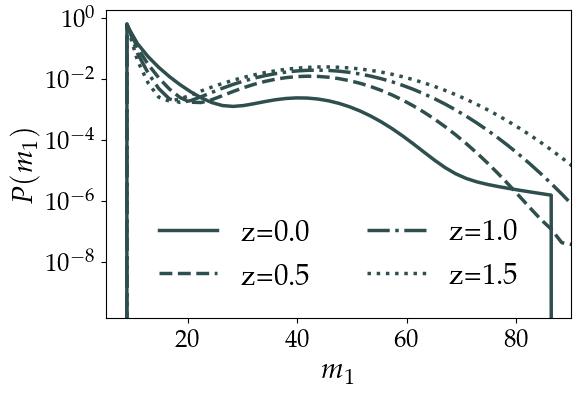

In [36]:
mm = np.linspace(5, 100, 50)
M1, M2 = np.meshgrid(mm,mm)
mass_wrap = icarogw.wrappers.massprior_PowerLawPeak()
mass_wrap=icarogw.wrappers.m1m2_conditioned(mass_wrap)

n_posterior_samples = 100_000
m1_prob, m2_prob  = np.zeros((n_posterior_samples, len(mm))), np.zeros((n_posterior_samples, len(mm)))

zz = np.array([0, 0.5, 1., 1.5])
linestyles = ['solid', 'dashed', 'dashdot', 'dotted']
my_fontsize=21


fig, ax = plt.subplots(figsize=(6, 4))
for i, z in enumerate(zz):
    
    mass_wrap.update(**{'alpha':alpha_z_inj(z),'beta':beta_z_inj(z),'mmin':mmin_z_inj(z),
                        'mmax':mmax_z_inj(z),'delta_m':3.19,'mu_g':mu_g_z_inj(z),
                        'sigma_g':sigma_g_z_inj(z),'lambda_peak':lambda_peak_z_inj(z)})
    pdf=mass_wrap.pdf(M1,M2)

    m1_prob = np.trapz(pdf,mm,axis=0)
    m2_prob = np.trapz(pdf,mm,axis=1)

    sns.lineplot(x = mm, y = m1_prob, color=my_color_darker, linewidth=2.5, linestyle=linestyles[i], label='z=%s' %z)

plt.xlabel('$m_1$', fontsize=my_fontsize)
plt.ylabel('$P(m_1)$', fontsize=my_fontsize)
plt.yscale('log')
plt.xlim(5, 90)
plt.legend(fontsize=my_fontsize, frameon=False, ncol=2)
plt.savefig('plots/mass_evolution.pdf', bbox_inches='tight')
plt.show()